In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_transaction = pd.read_csv('../data/processed_data/transactions.csv')
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200364 entries, 0 to 200363
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                200364 non-null  object 
 1   credit              200364 non-null  object 
 2   transaction_detail  200364 non-null  object 
 3   transaction_id      200364 non-null  float64
dtypes: float64(1), object(3)
memory usage: 6.1+ MB


In [3]:
df_transaction['credit'] = df_transaction['credit'].str.replace('.', '').astype(float)
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200364 entries, 0 to 200363
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                200364 non-null  object 
 1   credit              200364 non-null  float64
 2   transaction_detail  200364 non-null  object 
 3   transaction_id      200364 non-null  float64
dtypes: float64(2), object(2)
memory usage: 6.1+ MB


In [4]:
df_transaction.head(5)

,date,credit,transaction_detail,transaction_id
0,01/09/2024,50000.0,292976.010924.013647.xin cam on,5213.45946
1,01/09/2024,20000.0,VCB.CTDK.31/03/2024.ADIDA PHAT. CT tu 04810007...,5090.85797
2,01/09/2024,29000.0,MBVCB.6916176124.CAO VIET TUAN chuyen tien.CT ...,5241.83107
3,01/09/2024,3000.0,272986.010924.101858.DO DUC LOI chuyen tien,5218.87149
4,01/09/2024,3000.0,020097040509011046122024JDC5013867.96713 .1046...,5388.96713


In [5]:
df_transaction[df_transaction['credit'] > 10000000.0].to_csv('../data/output/high_value_transactions.csv', index=False)

In [6]:
credit_median = df_transaction['credit'].median()
print(credit_median)

200000.0


In [7]:
df_credit_per_day = df_transaction.groupby('date').agg(
    total_transaction = ('transaction_id', 'count'),
    total_credit = ('credit', 'sum')
).reset_index()

df_credit_per_day['total_credit'] = df_credit_per_day['total_credit'].apply(lambda x: f'{x:,.0f}')

df_credit_per_day

,date,total_transaction,total_credit
0,01/09/2024,14,"149,000"
1,02/09/2024,5,"572,000"
2,03/09/2024,9,"1,111,000"
3,04/09/2024,42,"7,681,000"
4,05/09/2024,32,"1,201,888"
5,06/09/2024,34,"1,706,000"
6,07/09/2024,59,"6,613,000"
7,08/09/2024,503,"885,410,201"
8,09/09/2024,6279,"7,868,744,495"
9,10/09/2024,193387,"126,308,988,811"


In [8]:
df_transaction.sort_values(by='credit', ascending=False).head(10)

,date,credit,transaction_detail,transaction_id
59457,10/09/2024,1.000000e+09,SHGD:10004067.DD:240910.BO:VAN PHONG HOC VIEN ...,5009.34878
81314,10/09/2024,5.000000e+08,SHGD:10008948.DD:240910.BO:CTY TNHH OLALA MEDI...,5009.80195
138206,10/09/2024,4.000000e+08,MBVCB.6997056113.Hoa Minzy cung FC xin duoc un...,5078.51136
2555,09/09/2024,3.000000e+08,020097042209091712522024VHQZ187912.6995 8.1712...,5390.69958
23248,10/09/2024,3.000000e+08,TAP THE LAI DO KDL TRANG AN UNG HO DONG BAO,1.45000
74906,10/09/2024,3.000000e+08,020097042209101456212024T5UZ508421.1576 6.1456...,5390.15766
104225,10/09/2024,3.000000e+08,398155.100924.174901.DUY CHINH ung ho Dong Bao...,5216.20838
16630,10/09/2024,2.500000e+08,939995.100924.075253.NGUYEN QUANG HAI UNG HO K...,5209.24565
97229,10/09/2024,2.000000e+08,810836.100924.170304.SOFIA UNG HO CAC TINH MIE...,5218.18910
78673,10/09/2024,2.000000e+08,SHGD:10006328.DD:240910.BO:CTY CP DAU TU VA XD...,5009.72124


In [9]:
# Define bins and labels
bins = [0, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 500000000, float('inf')]
labels = ['[0,10k]', '[10k,20k]', '[20k,50k]', '[50k,100k]', '[100k,500k]', '[500k,1M]', 
          '[1M,5M]', '[5M,10M]', '[10M,50M]', '[50M,100M]', '[100M,500M]', '[>500M]']

# Create a new column 'bin' with the bin labels
df_transaction['bin'] = pd.cut(df_transaction['credit'], bins=bins, labels=labels, right=False)

# Group by the 'bin' column and count the number of transactions in each bin
bin_counts = df_transaction['bin'].value_counts().sort_index()

# Create a new DataFrame with the bin labels and counts
df_bin_counts = pd.DataFrame({'Khoảng mệnh giá': bin_counts.index, 'Số lượng giao dịch': bin_counts.values})

print(df_bin_counts)

   Khoảng mệnh giá  Số lượng giao dịch
0          [0,10k]                1947
1        [10k,20k]                3762
2        [20k,50k]                6337
3       [50k,100k]               16886
4      [100k,500k]              105904
5        [500k,1M]               33513
6          [1M,5M]               27467
7         [5M,10M]                2507
8        [10M,50M]                1753
9       [50M,100M]                 180
10     [100M,500M]                 106
11         [>500M]                   2


C:\Users\Hi\AppData\Local\Temp\ipykernel_18136\221912538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bin_counts, x='Khoảng mệnh giá', y='Số lượng giao dịch', palette='viridis')


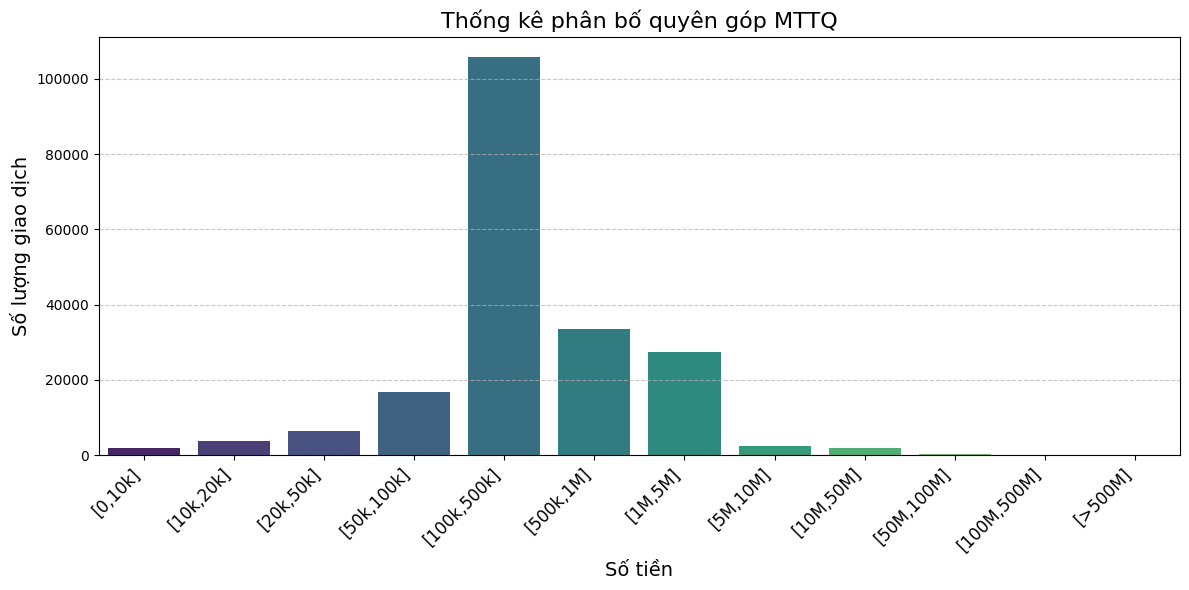

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_bin_counts, x='Khoảng mệnh giá', y='Số lượng giao dịch', palette='viridis')

# Customize the chart
plt.title('Thống kê phân bố quyên góp MTTQ', fontsize=16)
plt.xlabel('Số tiền', fontsize=14)
plt.ylabel('Số lượng giao dịch', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()